## import libs I will use later.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Define a global variable for cut 

In [7]:
cut_level = [
    'Fair',
    'Good',
    'Very Good',
    'Premium',
    'Ideal'
]

## load the data

In [6]:
data = pd.read_csv('diamonds.csv')

    1. Proportion of diamonds are between .30 and 1.08 carats

In [8]:
def caratRange(data, low, high):

    result = data[(data['carat'] >= low) & (data['carat'] <= high)]
    return result
carat_in_range = caratRange(data, 0.30, 1.08)
print('The proportion of diamonds are between .30 and 1.08 carats is : %.2f .' %
          (carat_in_range.shape[0] / data.shape[0]))

The proportion of diamonds are between .30 and 1.08 carats is : 0.75 .


    2.Number of the diamonds have equal x and y dimensions 

In [9]:
def equalXandY(data):

    result = data[data['x'] == data['y']]
    return result
equal_x_y = equalXandY(data)
print('%d diamonds have equal X and Y dimensions.' % equal_x_y.shape[0])


17 diamonds have equal X and Y dimensions.


    3.Number of the diamonds have a carat less than the mean carat value

In [10]:
carat_less_than_mean = caratRange(data, 0, data['carat'].mean())
print('%d diamonds have a carat less than the mean carat value.' %
          carat_less_than_mean.shape[0])

31127 diamonds have a carat less than the mean carat value.


    4.Number of diamonds have a Premium cut or better

In [11]:
def cutLevelCount(data, low, high):
    low_idx = cut_level.index(low)
    high_idx = cut_level.index(high)
    level = cut_level[low_idx:high_idx+1]
    result = (data['cut'] == level[0])
    for item in level:
        result = result | (data['cut'] == item)
    result = data[result]
    return result
cut = cutLevelCount(data, 'Premium', 'Ideal')
print('%d diamonds have a Premium cut or better.' % cut.shape[0])

35342 diamonds have a Premium cut or better.


    5.Which diamond has the highest price per carat? What is its value?

In [13]:
price_per_carat = data['price'] / data['carat']
idx = np.argmax(price_per_carat.values)
max_value = price_per_carat[idx]
print('%dth diamonds has the highest price per carat, the price is %d' %
          (idx, max_value))

27635th diamonds has the highest price per carat, the price is 17828


    6.Make a bar plot of the ‘cut’ data

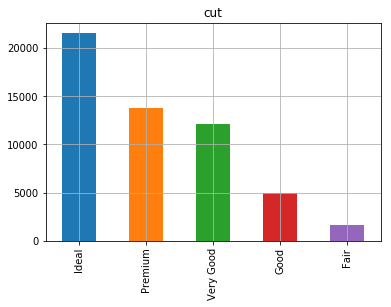

In [14]:
data['cut'].value_counts().plot.bar(grid=True, title='cut')
plt.show()

From this chart, I found that more than 20000 diamonds have a Ideal cut and less than 2500 diamonds have a Fair cut.

    7.Make boxplots of the diamond price for each cut 

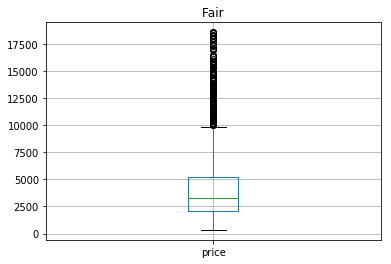

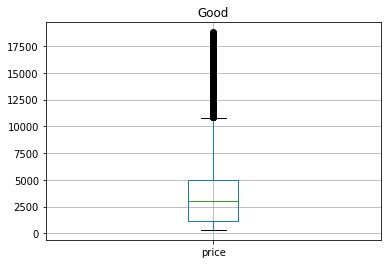

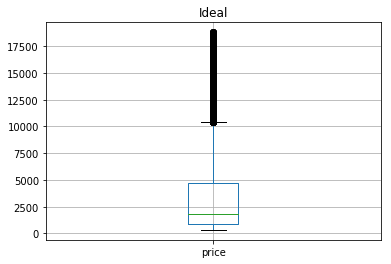

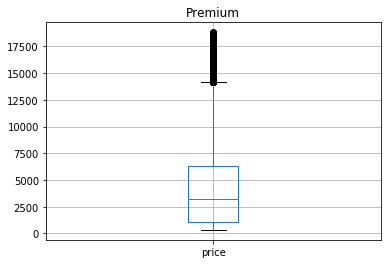

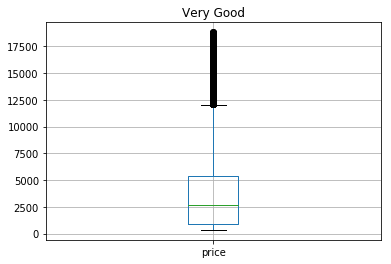

In [15]:
gp = data.groupby(by='cut')
for gp_name, gp_data in gp:
    gp_data['price'].plot(kind='box', title=gp_name, grid=True)
    plt.show()

From these figures, I found that there are lots of outlier values in each cut level. The normal value range is around 1000-5000. It indicate that some diamonds have price far above normal price.

    9.Make a scatter plot of price vs. carat

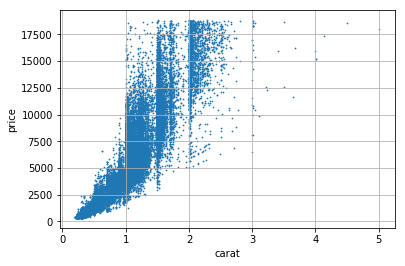

In [20]:
plt.scatter(data['carat'].values, data['price'].values, s=0.5)
plt.grid()
plt.xlabel('carat')
plt.ylabel('price')
plt.show()

From this figure, I noticed that lots of diamonds have small carat value and low price. The greater the carat value the diamond has, the higher price it has.